# Example of a simple 1 qubit circuit

# First Install Amazon Braket SDK

In [26]:
pip install amazon-braket-sdk

Note: you may need to restart the kernel to use updated packages.


In [27]:
import boto3
from braket.aws import AwsDevice
from braket.circuits import Circuit
import matplotlib.pyplot as plt
%matplotlib inline

# Define the S3 bucket and folder which contains the results of the various quantum circuits 

In [20]:
quantumbucket = "amazon-braket-us-east-1-614646524231"
foldername = "tasks/"
s3_folder=(quantumbucket,foldername)

# Choose the local simulator provided by Amazon Braket

Here is a list of all supported Braket devices : https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html

In [21]:
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

# Create a quantum circuit with one qubit

In [22]:
# Apply Hadamard gate to create a superposition
circuit = Circuit().h(0)

# Print out the circuit
print(circuit)

T  : |0|
        
q0 : -H-

T  : |0|


# Run the circuit on the chosen device

In [23]:
result = device.run(circuit, s3_folder, shots=1000).result()

In [24]:
# Print out the result
counts = result.measurement_counts
print(f"Counts: {counts}")

Counts: Counter({'1': 522, '0': 478})


# Use matplotlib to illustrate the probabilities of each qubit state

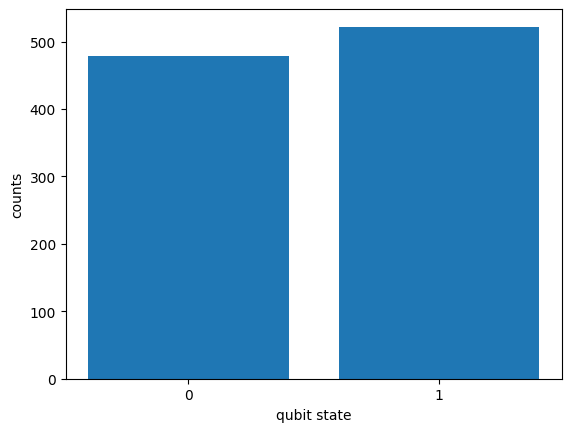

In [29]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('qubit state');
plt.ylabel('counts');